# ADS599 Capstone : GenoDetect Modeling

## Importing Libraries, Function Definitions

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, precision_score,recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVR
import math
import operator
from prettytable import PrettyTable
import random

In [10]:
#Metrics & ROC Function
def compute_metrics(actual, predicted):
    confmat = confusion_matrix(actual, predicted)
    print("Accuracy: " + str(accuracy_score(actual, predicted)))
    print("ROC-AUC: " + str(roc_auc_score(actual, predicted)))
    print(classification_report(actual, predicted, zero_division=0))
    disp = ConfusionMatrixDisplay(confusion_matrix=confmat)
    disp.plot()

# function for plotting roc curves
def roc_plots_generic(estimator, X_test, y_test, name, ax=None):
    '''
    Inputs:
        estimator: trained model with either predict_proba or decision_function method
        X_test: test data
        y_test: true labels for the test data
        name: model name (string)
        ax=None: axis
    Output:
        ax: axis
    '''
    if hasattr(estimator, 'predict_proba') and len(np.unique(y_test)) == 2:
        y_scores = estimator.predict_proba(X_test)[:, 1]
    elif hasattr(estimator, 'decision_function'):
        y_scores = estimator.decision_function(X_test)
    else:
        raise ValueError("Estimator does not have a valid predict_proba or decision_function method")

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
    auc = metrics.auc(fpr, tpr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 10))
        plt.title('')
        plt.xlabel('')
        plt.ylabel('')
        plt.legend('')
    ax.plot(fpr, tpr, label=f'{name}; AUC = {auc:.2}', linewidth=3)
    ax.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
    return ax

In [11]:
def roc_plots(est_name, name, ax=None):
    '''
    Inputs:
        est_name: model name (variable)
        name: model name (string)
        ax=None: axis
    Output:
        ax: axis
    '''
    roc = metrics.roc_curve(y_val, est_name)
    fpr,tpr,thresholds = metrics.roc_curve(y_val, est_name)
    auc = metrics.auc(fpr, tpr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 10))
        plt.title('')
        plt.xlabel('')
        plt.ylabel('')
        plt.legend('')
    ax.plot(fpr, tpr, label=f'{name}; AUC = {auc:.2}', linewidth=3)
    ax.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
    return ax

## Load in prepared data

In [12]:
# Load in data from numfill in preparation
drive.mount('/content/drive')

X_train=pd.read_csv('/content/drive/MyDrive/capstone/X_train.csv')
y_train=pd.read_csv('/content/drive/MyDrive/capstone/y_train.csv')

X_val=pd.read_csv('/content/drive/MyDrive/capstone/X_val.csv')
y_val=pd.read_csv('/content/drive/MyDrive/capstone/y_val.csv')

X_test=pd.read_csv('/content/drive/MyDrive/capstone/X_test.csv')
y_test=pd.read_csv('/content/drive/MyDrive/capstone/y_test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Logistic Regression

Cross-validation scores: [0.81777023 0.8180017  0.81771865 0.81715256 0.81743561]
Mean CV accuracy: 0.8176157503406719
Best hyperparameters: {'C': 0.001}
Accuracy: 0.8207333635129017
ROC-AUC: 0.5
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       396
         1.0       0.82      1.00      0.90      1813

    accuracy                           0.82      2209
   macro avg       0.41      0.50      0.45      2209
weighted avg       0.67      0.82      0.74      2209

Accuracy: 0.8093297101449275
ROC-AUC: 0.5
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       421
         1.0       0.81      1.00      0.89      1787

    accuracy                           0.81      2208
   macro avg       0.40      0.50      0.45      2208
weighted avg       0.66      0.81      0.72      2208



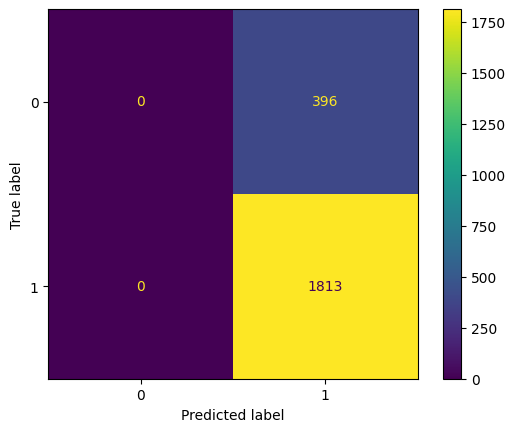

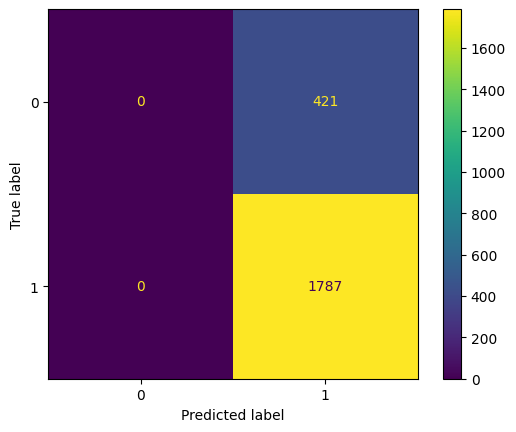

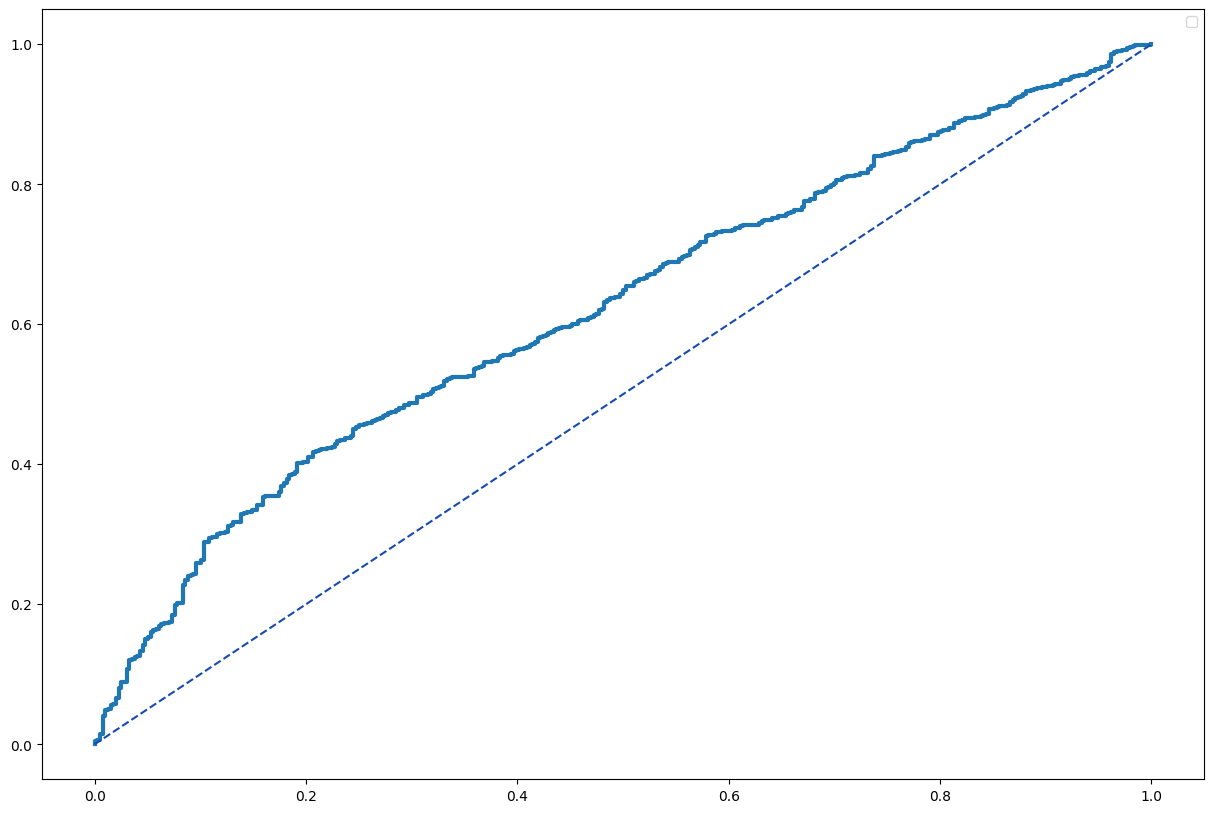

In [13]:
##Logreg addCV and Tune
random.seed(1234)
warnings.filterwarnings("ignore")
logRegression = LogisticRegression()

# Cross Validation
cv_scores = cross_val_score(logRegression, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Hyperparameter Tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(logRegression, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Tuned Model
tuned_logRegression = grid_search.best_estimator_
y_pred = tuned_logRegression.predict(X_test)

# Compute metrics
compute_metrics(y_test, y_pred)
compute_metrics(y_val, tuned_logRegression.predict(X_val))
roc_logreg = roc_plots_generic(tuned_logRegression, X_test, y_test, 'Logistic Regression')
logreg_prob = tuned_logRegression.predict_proba(X_val)[:, 1]

## Decision Tree

Accuracy: 0.7193300135808058
ROC-AUC: 0.5428290071147214
              precision    recall  f1-score   support

         0.0       0.24      0.27      0.25       396
         1.0       0.84      0.82      0.83      1813

    accuracy                           0.72      2209
   macro avg       0.54      0.54      0.54      2209
weighted avg       0.73      0.72      0.72      2209

Accuracy: 0.7232789855072463
ROC-AUC: 0.554872415851086
              precision    recall  f1-score   support

         0.0       0.28      0.28      0.28       421
         1.0       0.83      0.83      0.83      1787

    accuracy                           0.72      2208
   macro avg       0.55      0.55      0.55      2208
weighted avg       0.73      0.72      0.72      2208



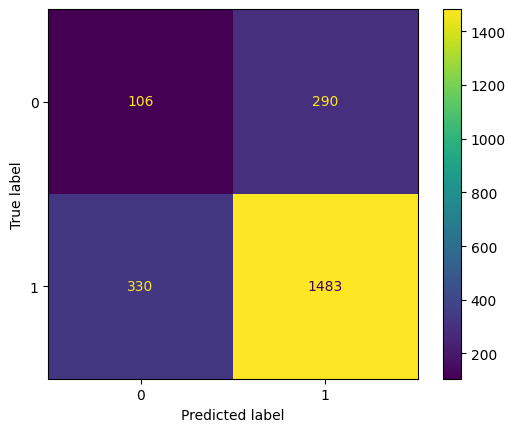

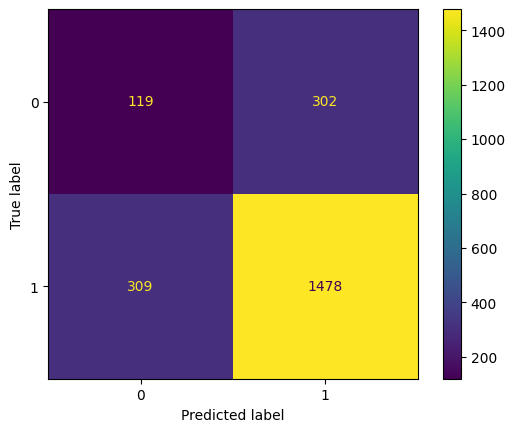

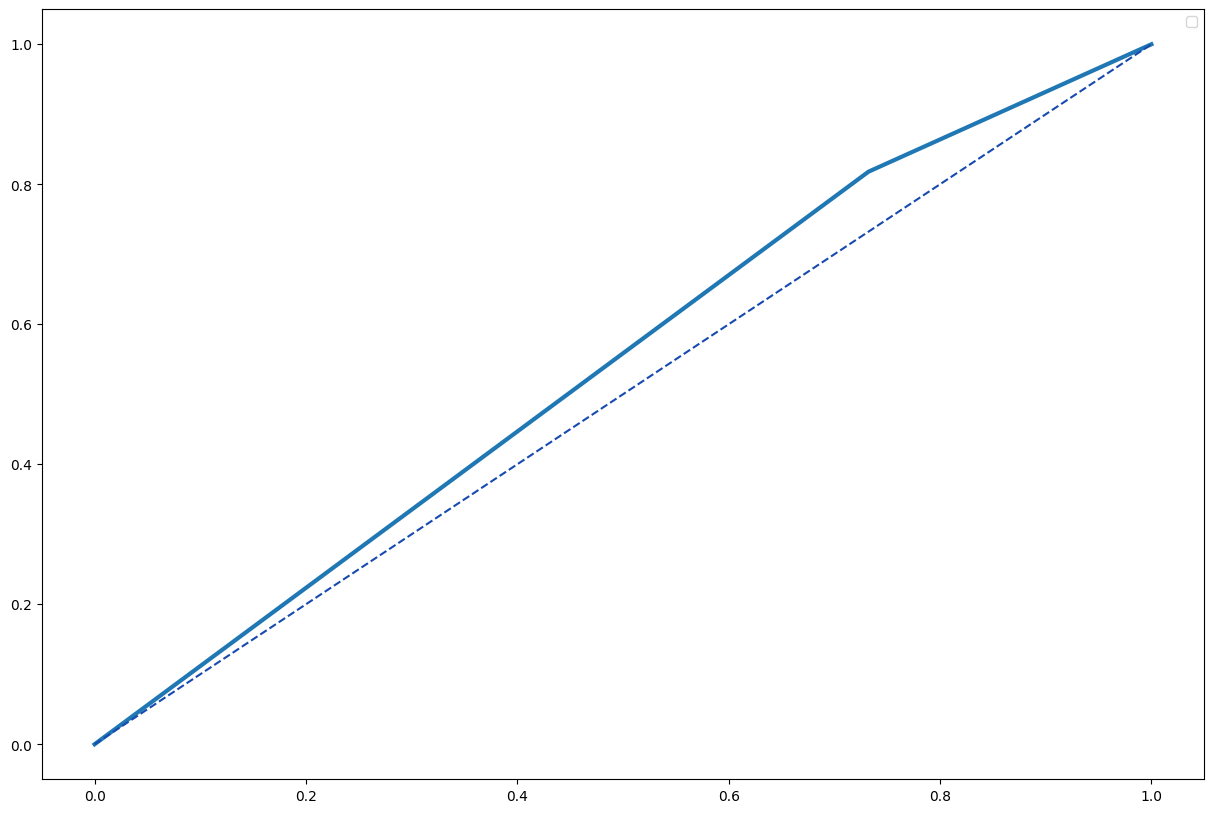

In [14]:
from sklearn.tree import DecisionTreeClassifier

random.seed(1234)
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)
compute_metrics(y_test, decisionTree.predict(X_test))
compute_metrics(y_val, decisionTree.predict(X_val))
roc_decision_tree = roc_plots_generic(decisionTree, X_test, y_test, 'Decision Tree')
dt_prob = decisionTree.predict_proba(X_val)[:, 1]

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random.seed(1234)
randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)
compute_metrics(y_test, randomForest.predict(X_test))
compute_metrics(y_val, randomForest.predict(X_val))
roc_random_forest = roc_plots_generic(randomForest, X_test, y_test, 'Random Forest')
rf_prob = randomForest.predict_proba(X_val)[:, 1]

##K-Nearest Neighbor

In [ ]:
# K Selection
random.seed(1234)
warnings.filterwarnings("ignore")
k_values = np.arange(1, 10)
train_accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    train_accuracy = knn_model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

# Plot the elbow curve
plt.plot(k_values, train_accuracies, marker='o')
plt.title('Elbow Plot for K-NN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Training Set Accuracy')
plt.show()

In [ ]:
##K-NN
random.seed(1234)
warnings.filterwarnings("ignore")
selected_k = 3
knn_model = KNeighborsClassifier(n_neighbors=selected_k)

# Cross Validation
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_predval = knn_model.predict(X_val)
compute_metrics(y_test, y_pred)
compute_metrics(y_val, y_predval)
roc_knn = roc_plots_generic(knn_model, X_test, y_test, 'K-NN')

In [ ]:
##K-NN Distances testing - not much of an impact. Select Manhattan Weighted as final
random.seed(1234)
selected_k = 3
warnings.filterwarnings("ignore")

# Manhattan, Distance
knn_model_manhattan_weighted = KNeighborsClassifier(n_neighbors=selected_k, metric='manhattan', weights='distance')

# Cross Validation
cv_scores = cross_val_score(knn_model_manhattan_weighted, X_train, y_train, cv=5)
print("\nCross-validation scores (Manhattan, Weighted):", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


knn_model_manhattan_weighted.fit(X_train, y_train)
y_pred = knn_model_manhattan_weighted.predict(X_test)
compute_metrics(y_test, y_pred)
knn_prob = knn_model_manhattan_weighted.predict_proba(X_val)[:, 1]
compute_metrics(y_val, knn_model_manhattan_weighted.predict(X_val))

## Naive Bayes

In [ ]:
## Naive Bayes add CV and Tune
random.seed(1234)
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()  # Just Gaussian for now

# Cross Validation
cv_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Hyperparameter Tuning - Probably can remove for NB?
param_grid = {}
grid_search = GridSearchCV(naive_bayes_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

tuned_naive_bayes_model = grid_search.best_estimator_
y_pred = tuned_naive_bayes_model.predict(X_test)

# Compute metrics
compute_metrics(y_test, y_pred)
compute_metrics(y_val, tuned_naive_bayes_model.predict(X_val))
roc_naive_bayes = roc_plots_generic(tuned_naive_bayes_model, X_test, y_test, 'Naive Bayes')
nb_prob = tuned_naive_bayes_model.predict_proba(X_val)[:, 1]

##Extreme Gradient Boosting

In [ ]:
random.seed(1234)
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    learning_rate=0.001,
    max_depth=1,
    n_estimators=100,
    reg_alpha=20.0,
    reg_lambda=20.0,
    gamma=0.01,
    eta=0.01
)

# Cross Validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Hyperparameter Tuning with increased L1 and L2 regularization, max_depth, gamma, and eta
param_grid = {
    'reg_alpha': [10.0, 20.0, 30.0],
    'reg_lambda': [10.0, 20.0, 30.0],
    'max_depth': [3, 4, 5],
    'gamma': [0.01, 0.02, 0.03],
    'eta': [0.01, 0.001, 0.0001]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

tuned_xgb_model = grid_search.best_estimator_
compute_metrics(y_val, tuned_xgb_model.predict(X_val))
y_pred = tuned_xgb_model.predict(X_test)
compute_metrics(y_test, y_pred)
roc_xgb = roc_plots_generic(tuned_xgb_model, X_test, y_test, 'XGBoost')
xgb_prob = tuned_xgb_model.predict_proba(X_val)[:, 1]

## Combine Final ROC Plots

In [ ]:
# Plot
ax = roc_plots(est_name=logreg_prob, name='Logistic Regression')
roc_plots(est_name=rf_prob, name='Random Forest', ax=ax)
roc_plots(est_name=dt_prob, name='Decision Tree', ax=ax)
roc_plots(est_name=knn_prob, name='KNN - Man, Dist', ax=ax)
roc_plots(est_name=nb_prob, name='Naive Bayes', ax=ax)
roc_plots(est_name=xgb_prob, name='XGBoost', ax=ax)
plt.title('ROC Curves', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.legend(loc='lower right', fontsize=18);